# Span Identification Experiment

Отчет о результатах: [презентация](https://ru.overleaf.com/read/ytgfgkkykssp#650135) и статья (черновик)

## Датасет с SemEval 2023 Task 11

Subtask 3 (spans)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

import re
from glob import glob

In [2]:
df_train = pd.read_csv('semeval-train-spans.csv')
df_test = pd.read_csv('semeval-test-spans.csv')

In [5]:
df_train.sample(10)

,path,span,label
5522,SemEval 2023 Dataset/data/en/train-articles-su...,tried to rein it in,Loaded_Language
1358,SemEval 2023 Dataset/data/en/train-articles-su...,harsh criticism,Loaded_Language
2868,SemEval 2023 Dataset/data/en/train-articles-su...,scandal,Repetition
7382,SemEval 2023 Dataset/data/en/train-articles-su...,God and a member,NaN
13475,SemEval 2023 Dataset/data/en/train-articles-su...,Saudi journalist in a Saudi diplomatic,NaN
14283,SemEval 2023 Dataset/data/en/train-articles-su...,should have. Email * Name This field is for va...,NaN
13330,SemEval 2023 Dataset/data/en/train-articles-su...,Dina Powell Heather Nauert Ivanka Trump Email ...,NaN
5014,SemEval 2023 Dataset/data/en/train-articles-su...,Dems,Name_Calling-Labeling
6723,SemEval 2023 Dataset/data/en/train-articles-su...,the partisans of the defeated candidate,Name_Calling-Labeling
1771,SemEval 2023 Dataset/data/en/train-articles-su...,fancy image-gathering hardware,Loaded_Language


In [109]:
len(glob('SemEval 2023 Dataset/data/en/train-articles-subtask-3/*.txt')), \
len(glob('SemEval 2023 Dataset/data/en/dev-articles-subtask-3/*.txt')), \
len(df_train), len(df_test)

(446, 90, 7201, 1801)

In [51]:
lens = []

for row in df_train.iterrows():
    lens.append(len(row[1].span.split()))
    
for row in df_test.iterrows():
    lens.append(len(row[1].span.split()))

In [79]:
hist, bin_edges = np.histogram(lens)
hist, bin_edges

(array([7626,  932,  287,  104,   30,   16,    5,    0,    0,    2],
       dtype=int64),
 array([  1.,  15.,  29.,  43.,  57.,  71.,  85.,  99., 113., 127., 141.]))

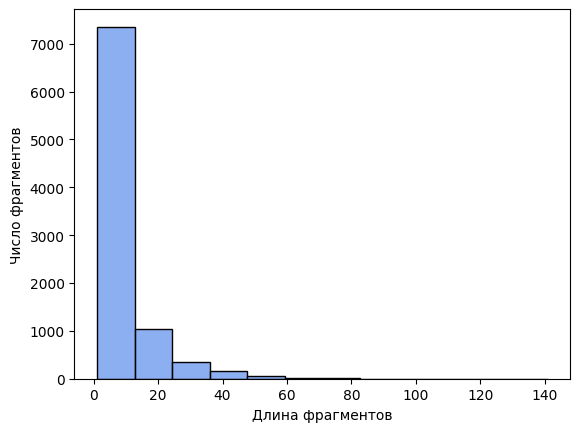

In [125]:
# plt.hist(lens, bins=30)
# plt.yscale('log')
# plt.show()

sns.histplot(lens, bins=12, color='cornflowerblue')
plt.xlabel('Длина фрагментов')
plt.ylabel('Число фрагментов')
# plt.title('Длина фрагментов на английском языке')
plt.savefig('images/semeval-len-spans.png', dpi=200)
plt.show()

In [58]:
stats.describe(lens), lens.count(1)

(DescribeResult(nobs=9002, minmax=(1, 141), mean=7.700288824705621, variance=105.3197843849634, skewness=3.222833176741486, kurtosis=16.038381175206876),
 1604)

In [66]:
classes = []

for row in df_train.iterrows():
    classes.append(row[1].label)
    
for row in df_test.iterrows():
    classes.append(row[1].label)

In [67]:
print(classes)

['Doubt', 'Appeal_to_Authority', 'Repetition', 'Appeal_to_Fear-Prejudice', 'Appeal_to_Fear-Prejudice', 'Appeal_to_Authority', 'Appeal_to_Fear-Prejudice', 'Appeal_to_Fear-Prejudice', 'Slogans', 'False_Dilemma-No_Choice', 'Slogans', 'Loaded_Language', 'Loaded_Language', 'Flag_Waving', 'Name_Calling-Labeling', 'Name_Calling-Labeling', 'Loaded_Language', 'Loaded_Language', 'Causal_Oversimplification', 'Loaded_Language', 'Name_Calling-Labeling', 'Causal_Oversimplification', 'Loaded_Language', 'Appeal_to_Hypocrisy', 'Causal_Oversimplification', 'Name_Calling-Labeling', 'Loaded_Language', 'Slogans', 'Obfuscation-Vagueness-Confusion', 'Appeal_to_Fear-Prejudice', 'Loaded_Language', 'Appeal_to_Authority', 'Loaded_Language', 'Loaded_Language', 'Causal_Oversimplification', 'Loaded_Language', 'Exaggeration-Minimisation', 'Loaded_Language', 'Doubt', 'Doubt', 'Name_Calling-Labeling', 'Doubt', 'Loaded_Language', 'Loaded_Language', 'Doubt', 'Exaggeration-Minimisation', 'Doubt', 'Loaded_Language', 'Name

In [123]:
cls = dict(zip(np.unique(classes, return_counts=True)[0], np.unique(classes, return_counts=True)[1]))
cls = dict(sorted(cls.items(), key=lambda item: -item[1]))
cls, len(cls)

({'Loaded_Language': 3016,
  'Name_Calling-Labeling': 1538,
  'Repetition': 922,
  'Doubt': 748,
  'Exaggeration-Minimisation': 655,
  'Appeal_to_Fear-Prejudice': 471,
  'Flag_Waving': 411,
  'Causal_Oversimplification': 247,
  'Slogans': 197,
  'False_Dilemma-No_Choice': 190,
  'Appeal_to_Authority': 179,
  'Conversation_Killer': 119,
  'Guilt_by_Association': 67,
  'Red_Herring': 64,
  'Appeal_to_Hypocrisy': 53,
  'Appeal_to_Popularity': 50,
  'Obfuscation-Vagueness-Confusion': 30,
  'Straw_Man': 25,
  'Whataboutism': 20},
 19)

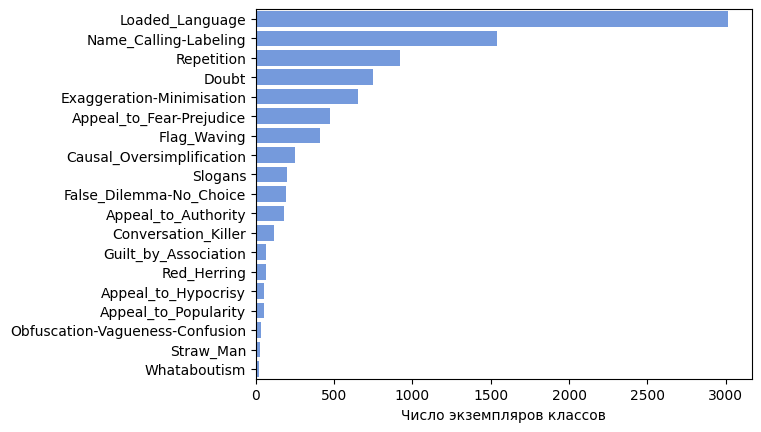

In [122]:
sns.barplot(cls, orient='y', color='cornflowerblue')
plt.xlabel('Число экземпляров классов')
plt.savefig('images/semeval-classes.png', dpi=200)
plt.show()

---

In [37]:
# df_train = pd.read_csv('semeval-train-spans.csv')
df_test = pd.read_csv('old_semeval-test-spans.csv')

In [38]:
df_test.head(21)

,path,span,label
0,SemEval 2023 Dataset/data/en/dev-articles-subt...,I guess her only chance is if Labour decides t...,False_Dilemma-No_Choice
1,SemEval 2023 Dataset/data/en/dev-articles-subt...,to dishonour democracy,Loaded_Language
2,SemEval 2023 Dataset/data/en/dev-articles-subt...,I don't see any way the Conservatives would vo...,False_Dilemma-No_Choice
3,SemEval 2023 Dataset/data/en/dev-articles-subt...,bitterly against it,Loaded_Language
4,SemEval 2023 Dataset/data/en/dev-articles-subt...,remoaner MPs,Name_Calling-Labeling
5,SemEval 2023 Dataset/data/en/dev-articles-subt...,dead in the water,Loaded_Language
6,SemEval 2023 Dataset/data/en/dev-articles-subt...,"that works, that's fine",Conversation_Killer
7,SemEval 2023 Dataset/data/en/dev-articles-subt...,that's a piece of technology which is manufact...,Red_Herring
8,SemEval 2023 Dataset/data/en/dev-articles-subt...,this is the world that really exists today,Conversation_Killer
9,SemEval 2023 Dataset/data/en/dev-articles-subt...,The EU makes a profit on its trade with the UK...,Obfuscation-Vagueness-Confusion


In [41]:
import numpy as np

p, count = np.unique(df_test['path'], return_counts=True)
# stats.describe(count)

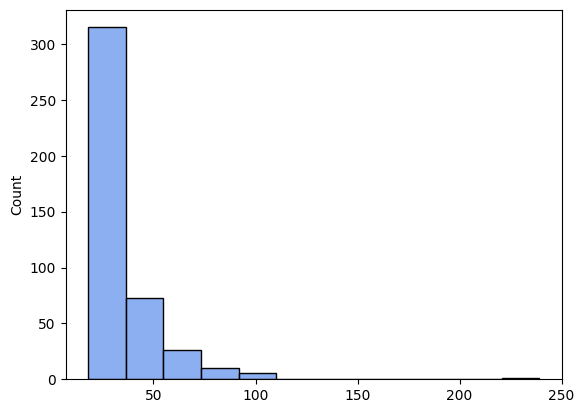

In [28]:
sns.histplot(count, bins=12, color='cornflowerblue')
plt.show()

---

In [24]:
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
import os
from tqdm import tqdm

mode = 'train'

# Read the CSV file
data = pd.read_csv('semeval-' + mode + '-spans.csv')

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for model_name in ['bert-base-uncased']:#, 'bert-base-cased', 'bert-large-uncased', 'bert-large-cased',
        #    'bert-base-multilingual-cased', 'bert-large-uncased-whole-word-masking',
        #    'bert-large-cased-whole-word-masking']:
    # Initialize the BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name).to(device)

    # Function to process text and generate embeddings
    def process_text_and_save_embeddings(text_path, model_name, mode):
        # Load text from file using the path
        with open(text_path, 'r', encoding='utf-8') as file:
            text = file.read()

        # Tokenize text without adding special tokens
        tokens = tokenizer.tokenize(text)

        # Split tokens into chunks with specified length and overlap
        chunk_length = 300
        overlap = 100
        token_chunks = [tokens[i:i+chunk_length] for i in range(0, len(tokens), chunk_length - overlap)]
        # print(list(range(0, len(tokens), chunk_length - overlap)), len(tokens))

        # Process each chunk and get embeddings
        embeddings = []
        _sum = 0
        for i, chunk in enumerate(token_chunks):
            # Add special tokens and create attention mask
            inputs = tokenizer.encode_plus(' '.join(chunk), add_special_tokens=True, return_tensors='pt', max_length=512, padding='max_length')
            input_ids = inputs['input_ids'].to(device)
            attention_mask = inputs['attention_mask'].to(device)

            zero_index = input_ids.cpu().numpy().tolist()[0].index(0) if 0 in input_ids.cpu().numpy().tolist()[0] else len(input_ids)
            # print(zero_index)
            _sum += zero_index
            # print('input_ids', len(inputs['input_ids'].cpu().numpy().tolist()[0]))

            # Get embeddings
            with torch.no_grad():
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                last_hidden_states = outputs.last_hidden_state
            # print('raw', last_hidden_states.shape)

            # Remove special tokens and concatenate remaining embeddings
            last_hidden_states = last_hidden_states[:, :zero_index, :]
            if i < len(token_chunks) - 1:
                last_hidden_states = last_hidden_states[:, 1:-overlap-1, :]
            # print('slc', last_hidden_states.shape)
            embeddings.append(last_hidden_states)

        # Concatenate embeddings from all chunks into one tensor
        concatenated_embeddings = torch.cat(embeddings, dim=1).to(device)
        # print(concatenated_embeddings.shape)
        # print(_sum - (len(token_chunks) - 1) * 100)
        # print()

        # Save the tensor to a file in the 'embeddings' folder
        embeddings_folder = model_name + '_' + mode + '_embeddings/'
        os.makedirs(embeddings_folder, exist_ok=True)  # Create 'embeddings' folder if it doesn't exist
        embeddings_filename = os.path.basename(text_path).replace('.txt', '_embeddings.pt')
        embeddings_path = os.path.join(embeddings_folder, embeddings_filename)
        torch.save(concatenated_embeddings, embeddings_path)

        return embeddings_path

    # Process unique paths and save embeddings
    embeddings_info = []
    for text_path in tqdm(data['path'].unique(), total=len(data['path'].unique()), desc=model_name + ' processing texts' + ' (' + mode + ')'):
        embeddings_path = process_text_and_save_embeddings(text_path, model_name, mode)
        embeddings_info.append({'path_to_text': text_path, 'path_to_embeddings': embeddings_path})

    # Create DataFrame with paths to text and embeddings
    embeddings_df = pd.DataFrame(embeddings_info)

    # Save DataFrame to CSV file
    embeddings_df.to_csv(model_name + '_' + mode + '_embeddings.csv', index=False)

bert-base-uncased processing texts (train): 100%|██████████| 431/431 [01:14<00:00,  5.76it/s]


In [25]:
emb = torch.load('bert-base-uncased_train_embeddings/article694811415_embeddings.pt')
emb.shape

torch.Size([1, 628, 768])

In [1]:
import pandas as pd
from transformers import BertTokenizer, BertModel, RobertaTokenizer, RobertaModel
import torch
import os
from tqdm import tqdm

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mode = 'train'

# Read the CSV file
data = pd.read_csv(f'semeval-{mode}-spans.csv')

# Initialize the BERT tokenizer and model and move to GPU
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)

# Function to process text and generate embeddings based on text spans
def process_text_and_save_embeddings(text_path, text_span, index, model_name, mode):
    # Load text from file using the path
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize text and span
    tokens = tokenizer.tokenize(text)
    span_tokens = tokenizer.tokenize(text_span)

    # Convert tokens to token IDs
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    span_token_ids = tokenizer.convert_tokens_to_ids(span_tokens)

    # Find the start and end token indexes of the span in the text tokens
    span_start, span_end = 0, 0
    for i in range(len(token_ids) - len(span_token_ids) + 1):
        if token_ids[i:i + len(span_token_ids)] == span_token_ids:
            span_start, span_end = i, i + len(span_token_ids) - 1
            break

    # Split tokens into chunks with specified length and overlap
    chunk_length = 510
    overlap = 100
    token_chunks = [[101] + token_ids[i:i + chunk_length] + [102] for i in range(0, len(token_ids), chunk_length - overlap)]

    # Process each chunk and get embeddings for the specified span
    embeddings = []
    for chunk in token_chunks:
        input_ids = torch.tensor(chunk).unsqueeze(0).to(device)

        # Get embeddings
        with torch.no_grad():
            outputs = model(input_ids=input_ids)
            last_hidden_states = outputs.last_hidden_state

        # Remove special tokens and concatenate remaining embeddings
        trimmed_embeddings = last_hidden_states[:, 1:len(chunk) + 1, :]
        if i < len(token_chunks) - 1:
            trimmed_embeddings = trimmed_embeddings[:, overlap:, :]

        embeddings.append(trimmed_embeddings)

    # Concatenate embeddings from all chunks into one tensor
    concatenated_embeddings = torch.cat(embeddings, dim=1).to(device)
    concatenated_embeddings = concatenated_embeddings[:, span_start:span_end + 1, :]

    # # Extract embeddings for the span
    # start_embedding = concatenated_embeddings[:, span_start, :]
    # end_embedding = concatenated_embeddings[:, span_end, :]

    # # Max pooling along the sequence length dimension
    # endpoint = torch.cat([start_embedding, end_embedding], dim=1)

    # Save the tensor to a file in the 'embeddings' folder
    embeddings_folder = f'{model_name}_{mode}_embeddings/'
    os.makedirs(embeddings_folder, exist_ok=True)  # Create 'embeddings' folder if it doesn't exist
    embeddings_filename = os.path.basename(text_path).replace('.txt', f'_{index}_span_raw_embeddings.pt')
    embeddings_path = os.path.join(embeddings_folder, embeddings_filename)
    torch.save(concatenated_embeddings, embeddings_path)

    return embeddings_path

# Process unique paths and save span-max-pooled embeddings
embeddings_info = []
for index, row in tqdm(data.iterrows(), total=len(data), desc='Processing spans'):
    text_path = row['path']  # Update this with the actual folder path
    text_span = row['span']  # Assuming 'span' column contains text-based spans like 'start-end'
    embeddings_path = process_text_and_save_embeddings(text_path, text_span, index, model_name, mode)
    embeddings_info.append({'path_to_text': text_path, 'path_to_embeddings': embeddings_path, 'label': row['label']})

# Create DataFrame with paths to text and embeddings
embeddings_df = pd.DataFrame(embeddings_info)

# Save the DataFrame to a CSV file
embeddings_info_path = f'{model_name}_{mode}_embeddings_with_span_raw.csv'
embeddings_df.to_csv(embeddings_info_path, index=False)

d:\OneDrive\Documents\ДИССЕРТАЦИЯ\Span Identification Project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Processing spans: 100%|██████████| 14528/14528 [1:39:23<00:00,  2.44it/s]   


In [2]:
import pandas as pd
from transformers import BertTokenizer, BertModel, RobertaTokenizer, RobertaModel
import torch
import os
from tqdm import tqdm

# Check if GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

mode = 'test'

# Read the CSV file
data = pd.read_csv(f'semeval-{mode}-spans.csv')

# Initialize the BERT tokenizer and model and move to GPU
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name).to(device)

# Function to process text and generate embeddings based on text spans
def process_text_and_save_embeddings(text_path, text_span, index, model_name, mode):
    # Load text from file using the path
    with open(text_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize text and span
    tokens = tokenizer.tokenize(text)
    span_tokens = tokenizer.tokenize(text_span)

    # Convert tokens to token IDs
    token_ids = tokenizer.convert_tokens_to_ids(tokens)
    span_token_ids = tokenizer.convert_tokens_to_ids(span_tokens)

    # Find the start and end token indexes of the span in the text tokens
    span_start, span_end = 0, 0
    for i in range(len(token_ids) - len(span_token_ids) + 1):
        if token_ids[i:i + len(span_token_ids)] == span_token_ids:
            span_start, span_end = i, i + len(span_token_ids) - 1
            break

    # print(span_start, span_end)

    # Split tokens into chunks with specified length and overlap
    chunk_length = 510
    overlap = 100
    token_chunks = [[101] + token_ids[i:i + chunk_length] + [102] for i in range(0, len(token_ids), chunk_length - overlap)]

    # Process each chunk and get embeddings for the specified span
    embeddings = []
    for chunk in token_chunks:
        input_ids = torch.tensor(chunk).unsqueeze(0).to(device)

        # Get embeddings
        with torch.no_grad():
            outputs = model(input_ids=input_ids)
            last_hidden_states = outputs.last_hidden_state

        # Remove special tokens and concatenate remaining embeddings
        trimmed_embeddings = last_hidden_states[:, 1:len(chunk) + 1, :]
        if i < len(token_chunks) - 1:
            trimmed_embeddings = trimmed_embeddings[:, overlap:, :]

        embeddings.append(trimmed_embeddings)

    # Concatenate embeddings from all chunks into one tensor
    concatenated_embeddings = torch.cat(embeddings, dim=1).to(device)
    concatenated_embeddings = concatenated_embeddings[:, span_start:span_end + 1, :]

    # # Extract embeddings for the span
    # start_embedding = concatenated_embeddings[:, span_start, :]
    # end_embedding = concatenated_embeddings[:, span_end, :]

    # # Max pooling along the sequence length dimension
    # endpoint = torch.cat([start_embedding, end_embedding], dim=1)

    # Save the tensor to a file in the 'embeddings' folder
    embeddings_folder = f'{model_name}_{mode}_embeddings/'
    os.makedirs(embeddings_folder, exist_ok=True)  # Create 'embeddings' folder if it doesn't exist
    embeddings_filename = os.path.basename(text_path).replace('.txt', f'_{index}_span_raw_embeddings.pt')
    embeddings_path = os.path.join(embeddings_folder, embeddings_filename)
    torch.save(concatenated_embeddings, embeddings_path)

    return embeddings_path

# Process unique paths and save span-max-pooled embeddings
embeddings_info = []
for index, row in tqdm(data.iterrows(), total=len(data), desc='Processing spans'):
    text_path = row['path']  # Update this with the actual folder path
    text_span = row['span']  # Assuming 'span' column contains text-based spans like 'start-end'
    embeddings_path = process_text_and_save_embeddings(text_path, text_span, index, model_name, mode)
    embeddings_info.append({'path_to_text': text_path, 'path_to_embeddings': embeddings_path, 'label': row['label']})

# Create DataFrame with paths to text and embeddings
embeddings_df = pd.DataFrame(embeddings_info)

# Save the DataFrame to a CSV file
embeddings_info_path = f'{model_name}_{mode}_embeddings_with_span_raw.csv'
embeddings_df.to_csv(embeddings_info_path, index=False)

Processing spans: 100%|██████████| 3280/3280 [21:38<00:00,  2.53it/s]  


In [33]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
data = pd.read_csv('bert-base-uncased_train_embeddings_with_span_diff-sum.csv')['label'].values.reshape(-1, 1)
onehot_encoder.fit(data)

class CustomDataset(Dataset):
    def __init__(self, csv_file, onehot_encoder):
        self.data = pd.read_csv(csv_file)
        self.onehot_encoder = onehot_encoder
        self.labels = onehot_encoder.transform(self.data['label'].values.reshape(-1, 1))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = self.data.iloc[idx]['path_to_embeddings']
        # label = self.data.iloc[idx]['label']
        label = self.labels[idx]

        # Load embedding from .pt file
        embedding = torch.load(file_path).cpu()

        # # Perform one-hot encoding for the label
        # label_onehot = self.onehot_encoder.transform([[label]])[0]

        # return embedding, torch.FloatTensor(label_onehot)
        return embedding, torch.FloatTensor(label)
    
# Paths to train and test CSV files
train_csv_path = 'bert-base-uncased_train_embeddings_with_span_diff-sum.csv'
test_csv_path = 'bert-base-uncased_test_embeddings_with_span_diff-sum.csv'

# Create instances of CustomDataset for train and test
train_dataset = CustomDataset(train_csv_path, onehot_encoder)
test_dataset = CustomDataset(test_csv_path, onehot_encoder)

# Define batch sizes
train_batch_size = 128
test_batch_size = 128

# Create DataLoaders for train and test datasets
train_data_loader = DataLoader(train_dataset, batch_size=train_batch_size, shuffle=True)
test_data_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

d:\OneDrive\Documents\ДИССЕРТАЦИЯ\Span Identification Project\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
test_dataset[0]

(tensor([[-0.3304, -0.0032,  0.1859,  ..., -0.7387, -0.0578,  0.3866]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]))

In [114]:
import torch.nn.functional as F
import torch.nn as nn

class CustomLinearClassifier(nn.Module):
    def __init__(self, input_dim=768, num_classes=20):
        super(CustomLinearClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.bn1 = nn.BatchNorm1d(1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(512, 128)
        self.bn3 = nn.BatchNorm1d(1)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x = self.dropout1(self.relu1(self.bn1(self.fc1(x))))
        # x = self.dropout2(self.relu2(self.bn2(self.fc2(x))))
        # x = self.dropout3(self.relu3(self.bn3(self.fc3(x))))
        x = self.relu1(self.bn1(self.fc1(x)))
        x = self.relu2(self.bn2(self.fc2(x)))
        x = self.relu3(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        x = F.softmax(x, dim=0)
        return x

Epoch 1: 100%|██████████| 114/114 [00:05<00:00, 20.76it/s]


Epoch [1/200] Train Loss: 2.9857 Val Loss: 2.9914 Precision: 0.0716 Recall: 0.0678 F1 Score: 0.0420


Epoch 2: 100%|██████████| 114/114 [00:06<00:00, 18.01it/s]


Epoch [2/200] Train Loss: 2.9784 Val Loss: 2.9904 Precision: 0.0882 Recall: 0.0653 F1 Score: 0.0322


Epoch 3: 100%|██████████| 114/114 [00:06<00:00, 17.36it/s]


Epoch [3/200] Train Loss: 2.9742 Val Loss: 2.9879 Precision: 0.1153 Recall: 0.1179 F1 Score: 0.0510


Epoch 4: 100%|██████████| 114/114 [00:06<00:00, 17.62it/s]


Epoch [4/200] Train Loss: 2.9716 Val Loss: 2.9877 Precision: 0.1042 Recall: 0.0883 F1 Score: 0.0383


Epoch 5: 100%|██████████| 114/114 [00:06<00:00, 17.41it/s]


Epoch [5/200] Train Loss: 2.9694 Val Loss: 2.9891 Precision: 0.1166 Recall: 0.1086 F1 Score: 0.0375


Epoch 6: 100%|██████████| 114/114 [00:06<00:00, 17.21it/s]


Epoch [6/200] Train Loss: 2.9674 Val Loss: 2.9887 Precision: 0.1011 Recall: 0.0876 F1 Score: 0.0390


Epoch 7: 100%|██████████| 114/114 [00:06<00:00, 16.88it/s]


Epoch [7/200] Train Loss: 2.9674 Val Loss: 2.9895 Precision: 0.1036 Recall: 0.1087 F1 Score: 0.0376


Epoch 8: 100%|██████████| 114/114 [00:06<00:00, 17.34it/s]


Epoch [8/200] Train Loss: 2.9657 Val Loss: 2.9880 Precision: 0.1217 Recall: 0.0920 F1 Score: 0.0492


Epoch 9: 100%|██████████| 114/114 [00:06<00:00, 17.54it/s]


Epoch [9/200] Train Loss: 2.9649 Val Loss: 2.9881 Precision: 0.1062 Recall: 0.0737 F1 Score: 0.0413


Epoch 10: 100%|██████████| 114/114 [00:06<00:00, 17.66it/s]


Epoch [10/200] Train Loss: 2.9652 Val Loss: 2.9882 Precision: 0.1037 Recall: 0.0817 F1 Score: 0.0391


Epoch 11: 100%|██████████| 114/114 [00:06<00:00, 17.75it/s]


Epoch [11/200] Train Loss: 2.9649 Val Loss: 2.9893 Precision: 0.1065 Recall: 0.0844 F1 Score: 0.0486


Epoch 12: 100%|██████████| 114/114 [00:06<00:00, 17.76it/s]


Epoch [12/200] Train Loss: 2.9629 Val Loss: 2.9882 Precision: 0.0943 Recall: 0.0665 F1 Score: 0.0383


Epoch 13: 100%|██████████| 114/114 [00:06<00:00, 17.52it/s]


Epoch [13/200] Train Loss: 2.9625 Val Loss: 2.9883 Precision: 0.1054 Recall: 0.1061 F1 Score: 0.0434


Epoch 14: 100%|██████████| 114/114 [00:06<00:00, 17.76it/s]


Epoch [14/200] Train Loss: 2.9614 Val Loss: 2.9865 Precision: 0.1060 Recall: 0.1172 F1 Score: 0.0530


Epoch 15: 100%|██████████| 114/114 [00:06<00:00, 17.08it/s]


Epoch [15/200] Train Loss: 2.9601 Val Loss: 2.9892 Precision: 0.0886 Recall: 0.1066 F1 Score: 0.0493


Epoch 16: 100%|██████████| 114/114 [00:06<00:00, 17.53it/s]


Epoch [16/200] Train Loss: 2.9583 Val Loss: 2.9865 Precision: 0.1030 Recall: 0.1195 F1 Score: 0.0586


Epoch 17: 100%|██████████| 114/114 [00:06<00:00, 18.50it/s]


Epoch [17/200] Train Loss: 2.9579 Val Loss: 2.9869 Precision: 0.1059 Recall: 0.0914 F1 Score: 0.0606


Epoch 18: 100%|██████████| 114/114 [00:06<00:00, 18.22it/s]


Epoch [18/200] Train Loss: 2.9572 Val Loss: 2.9890 Precision: 0.1033 Recall: 0.0785 F1 Score: 0.0523


Epoch 19: 100%|██████████| 114/114 [00:06<00:00, 17.98it/s]


Epoch [19/200] Train Loss: 2.9552 Val Loss: 2.9882 Precision: 0.1165 Recall: 0.1065 F1 Score: 0.0548


Epoch 20: 100%|██████████| 114/114 [00:06<00:00, 18.18it/s]


Epoch [20/200] Train Loss: 2.9554 Val Loss: 2.9872 Precision: 0.1061 Recall: 0.0989 F1 Score: 0.0485


Epoch 21: 100%|██████████| 114/114 [00:06<00:00, 17.23it/s]


Epoch [21/200] Train Loss: 2.9557 Val Loss: 2.9868 Precision: 0.1117 Recall: 0.1075 F1 Score: 0.0528


Epoch 22: 100%|██████████| 114/114 [00:06<00:00, 17.13it/s]


Epoch [22/200] Train Loss: 2.9545 Val Loss: 2.9885 Precision: 0.1148 Recall: 0.0871 F1 Score: 0.0525


Epoch 23: 100%|██████████| 114/114 [00:06<00:00, 17.06it/s]


Epoch [23/200] Train Loss: 2.9545 Val Loss: 2.9877 Precision: 0.1110 Recall: 0.0851 F1 Score: 0.0535


Epoch 24: 100%|██████████| 114/114 [00:06<00:00, 17.41it/s]


Epoch [24/200] Train Loss: 2.9521 Val Loss: 2.9880 Precision: 0.1014 Recall: 0.0791 F1 Score: 0.0497


Epoch 25: 100%|██████████| 114/114 [00:06<00:00, 17.79it/s]


Epoch [25/200] Train Loss: 2.9532 Val Loss: 2.9872 Precision: 0.1132 Recall: 0.0753 F1 Score: 0.0457


Epoch 26: 100%|██████████| 114/114 [00:06<00:00, 18.43it/s]


Epoch [26/200] Train Loss: 2.9531 Val Loss: 2.9880 Precision: 0.1118 Recall: 0.1213 F1 Score: 0.0456


Epoch 27: 100%|██████████| 114/114 [00:06<00:00, 18.41it/s]


Epoch [27/200] Train Loss: 2.9514 Val Loss: 2.9869 Precision: 0.1259 Recall: 0.0893 F1 Score: 0.0548


Epoch 28: 100%|██████████| 114/114 [00:06<00:00, 18.09it/s]


Epoch [28/200] Train Loss: 2.9531 Val Loss: 2.9876 Precision: 0.1242 Recall: 0.0811 F1 Score: 0.0571


Epoch 29: 100%|██████████| 114/114 [00:06<00:00, 18.19it/s]


Epoch [29/200] Train Loss: 2.9519 Val Loss: 2.9878 Precision: 0.1129 Recall: 0.1156 F1 Score: 0.0577


Epoch 30: 100%|██████████| 114/114 [00:06<00:00, 18.37it/s]


Epoch [30/200] Train Loss: 2.9523 Val Loss: 2.9884 Precision: 0.1224 Recall: 0.0695 F1 Score: 0.0554


Epoch 31: 100%|██████████| 114/114 [00:06<00:00, 18.14it/s]


Epoch [31/200] Train Loss: 2.9502 Val Loss: 2.9882 Precision: 0.1120 Recall: 0.0684 F1 Score: 0.0467


Epoch 32: 100%|██████████| 114/114 [00:06<00:00, 18.89it/s]


Epoch [32/200] Train Loss: 2.9501 Val Loss: 2.9867 Precision: 0.0974 Recall: 0.0918 F1 Score: 0.0479


Epoch 33: 100%|██████████| 114/114 [00:06<00:00, 17.93it/s]


Epoch [33/200] Train Loss: 2.9496 Val Loss: 2.9877 Precision: 0.1035 Recall: 0.1120 F1 Score: 0.0565


Epoch 34: 100%|██████████| 114/114 [00:06<00:00, 18.74it/s]


Epoch [34/200] Train Loss: 2.9492 Val Loss: 2.9873 Precision: 0.1107 Recall: 0.1069 F1 Score: 0.0525


Epoch 35: 100%|██████████| 114/114 [00:06<00:00, 18.69it/s]


Epoch [35/200] Train Loss: 2.9488 Val Loss: 2.9886 Precision: 0.1089 Recall: 0.1257 F1 Score: 0.0571


Epoch 36: 100%|██████████| 114/114 [00:06<00:00, 18.12it/s]


Epoch [36/200] Train Loss: 2.9488 Val Loss: 2.9862 Precision: 0.1240 Recall: 0.1426 F1 Score: 0.0654


Epoch 37: 100%|██████████| 114/114 [00:06<00:00, 17.71it/s]


Epoch [37/200] Train Loss: 2.9486 Val Loss: 2.9870 Precision: 0.1314 Recall: 0.1590 F1 Score: 0.0779


Epoch 38: 100%|██████████| 114/114 [00:06<00:00, 17.19it/s]


Epoch [38/200] Train Loss: 2.9501 Val Loss: 2.9868 Precision: 0.1299 Recall: 0.0782 F1 Score: 0.0552


Epoch 39: 100%|██████████| 114/114 [00:06<00:00, 17.30it/s]


Epoch [39/200] Train Loss: 2.9478 Val Loss: 2.9870 Precision: 0.1167 Recall: 0.1017 F1 Score: 0.0547


Epoch 40: 100%|██████████| 114/114 [00:06<00:00, 17.67it/s]


Epoch [40/200] Train Loss: 2.9465 Val Loss: 2.9875 Precision: 0.1105 Recall: 0.0613 F1 Score: 0.0430


Epoch 41: 100%|██████████| 114/114 [00:06<00:00, 18.48it/s]


Epoch [41/200] Train Loss: 2.9484 Val Loss: 2.9867 Precision: 0.1164 Recall: 0.1204 F1 Score: 0.0507


Epoch 42: 100%|██████████| 114/114 [00:06<00:00, 18.34it/s]


Epoch [42/200] Train Loss: 2.9466 Val Loss: 2.9878 Precision: 0.1169 Recall: 0.0965 F1 Score: 0.0547


Epoch 43: 100%|██████████| 114/114 [00:06<00:00, 18.29it/s]


Epoch [43/200] Train Loss: 2.9462 Val Loss: 2.9879 Precision: 0.1066 Recall: 0.0981 F1 Score: 0.0499


Epoch 44: 100%|██████████| 114/114 [00:06<00:00, 18.47it/s]


Epoch [44/200] Train Loss: 2.9473 Val Loss: 2.9868 Precision: 0.1223 Recall: 0.0873 F1 Score: 0.0564


Epoch 45: 100%|██████████| 114/114 [00:06<00:00, 18.84it/s]


Epoch [45/200] Train Loss: 2.9466 Val Loss: 2.9852 Precision: 0.1322 Recall: 0.1104 F1 Score: 0.0626


Epoch 46: 100%|██████████| 114/114 [00:05<00:00, 19.26it/s]


Epoch [46/200] Train Loss: 2.9457 Val Loss: 2.9866 Precision: 0.1189 Recall: 0.0810 F1 Score: 0.0545


Epoch 47: 100%|██████████| 114/114 [00:06<00:00, 18.93it/s]


Epoch [47/200] Train Loss: 2.9464 Val Loss: 2.9883 Precision: 0.1079 Recall: 0.0896 F1 Score: 0.0471


Epoch 48: 100%|██████████| 114/114 [00:06<00:00, 18.38it/s]


Epoch [48/200] Train Loss: 2.9452 Val Loss: 2.9873 Precision: 0.1187 Recall: 0.0895 F1 Score: 0.0521


Epoch 49: 100%|██████████| 114/114 [00:05<00:00, 21.13it/s]


Epoch [49/200] Train Loss: 2.9443 Val Loss: 2.9868 Precision: 0.1161 Recall: 0.1010 F1 Score: 0.0593


Epoch 50: 100%|██████████| 114/114 [00:06<00:00, 18.60it/s]


Epoch [50/200] Train Loss: 2.9441 Val Loss: 2.9878 Precision: 0.1220 Recall: 0.0661 F1 Score: 0.0562


Epoch 51: 100%|██████████| 114/114 [00:06<00:00, 18.68it/s]


Epoch [51/200] Train Loss: 2.9446 Val Loss: 2.9868 Precision: 0.1259 Recall: 0.0991 F1 Score: 0.0621


Epoch 52: 100%|██████████| 114/114 [00:06<00:00, 18.12it/s]


Epoch [52/200] Train Loss: 2.9445 Val Loss: 2.9867 Precision: 0.1360 Recall: 0.0942 F1 Score: 0.0627


Epoch 53: 100%|██████████| 114/114 [00:06<00:00, 18.25it/s]


Epoch [53/200] Train Loss: 2.9430 Val Loss: 2.9860 Precision: 0.1168 Recall: 0.0734 F1 Score: 0.0589


Epoch 54: 100%|██████████| 114/114 [00:06<00:00, 18.24it/s]


Epoch [54/200] Train Loss: 2.9427 Val Loss: 2.9875 Precision: 0.1117 Recall: 0.0661 F1 Score: 0.0566


Epoch 55: 100%|██████████| 114/114 [00:06<00:00, 18.13it/s]


Epoch [55/200] Train Loss: 2.9425 Val Loss: 2.9871 Precision: 0.1240 Recall: 0.0800 F1 Score: 0.0638


Epoch 56: 100%|██████████| 114/114 [00:06<00:00, 17.28it/s]


Epoch [56/200] Train Loss: 2.9427 Val Loss: 2.9882 Precision: 0.1211 Recall: 0.0989 F1 Score: 0.0647


Epoch 57: 100%|██████████| 114/114 [00:06<00:00, 18.05it/s]


Epoch [57/200] Train Loss: 2.9420 Val Loss: 2.9882 Precision: 0.1016 Recall: 0.0800 F1 Score: 0.0484


Epoch 58: 100%|██████████| 114/114 [00:05<00:00, 21.68it/s]


Epoch [58/200] Train Loss: 2.9423 Val Loss: 2.9882 Precision: 0.1035 Recall: 0.0784 F1 Score: 0.0533


Epoch 59: 100%|██████████| 114/114 [00:06<00:00, 18.02it/s]


Epoch [59/200] Train Loss: 2.9413 Val Loss: 2.9883 Precision: 0.1204 Recall: 0.0822 F1 Score: 0.0653


Epoch 60: 100%|██████████| 114/114 [00:06<00:00, 18.39it/s]


Epoch [60/200] Train Loss: 2.9420 Val Loss: 2.9880 Precision: 0.1103 Recall: 0.0886 F1 Score: 0.0576


Epoch 61: 100%|██████████| 114/114 [00:06<00:00, 17.89it/s]


Epoch [61/200] Train Loss: 2.9406 Val Loss: 2.9866 Precision: 0.1118 Recall: 0.1057 F1 Score: 0.0597


Epoch 62: 100%|██████████| 114/114 [00:06<00:00, 17.06it/s]


Epoch [62/200] Train Loss: 2.9408 Val Loss: 2.9864 Precision: 0.1308 Recall: 0.0761 F1 Score: 0.0632


Epoch 63: 100%|██████████| 114/114 [00:06<00:00, 18.19it/s]


Epoch [63/200] Train Loss: 2.9420 Val Loss: 2.9867 Precision: 0.1243 Recall: 0.0863 F1 Score: 0.0596


Epoch 64: 100%|██████████| 114/114 [00:06<00:00, 16.58it/s]


Epoch [64/200] Train Loss: 2.9410 Val Loss: 2.9856 Precision: 0.1168 Recall: 0.1016 F1 Score: 0.0654


Epoch 65: 100%|██████████| 114/114 [00:06<00:00, 18.66it/s]


Epoch [65/200] Train Loss: 2.9410 Val Loss: 2.9865 Precision: 0.1127 Recall: 0.0967 F1 Score: 0.0596


Epoch 66: 100%|██████████| 114/114 [00:06<00:00, 18.09it/s]


Epoch [66/200] Train Loss: 2.9402 Val Loss: 2.9863 Precision: 0.1242 Recall: 0.1183 F1 Score: 0.0658


Epoch 67: 100%|██████████| 114/114 [00:06<00:00, 18.91it/s]


Epoch [67/200] Train Loss: 2.9414 Val Loss: 2.9864 Precision: 0.1073 Recall: 0.0810 F1 Score: 0.0548


Epoch 68: 100%|██████████| 114/114 [00:05<00:00, 21.69it/s]


Epoch [68/200] Train Loss: 2.9414 Val Loss: 2.9862 Precision: 0.1068 Recall: 0.0980 F1 Score: 0.0579


Epoch 69: 100%|██████████| 114/114 [00:05<00:00, 22.03it/s]


Epoch [69/200] Train Loss: 2.9399 Val Loss: 2.9871 Precision: 0.1177 Recall: 0.1304 F1 Score: 0.0644


Epoch 70: 100%|██████████| 114/114 [00:06<00:00, 17.54it/s]


Epoch [70/200] Train Loss: 2.9392 Val Loss: 2.9872 Precision: 0.1073 Recall: 0.1120 F1 Score: 0.0630


Epoch 71: 100%|██████████| 114/114 [00:04<00:00, 22.90it/s]


Epoch [71/200] Train Loss: 2.9400 Val Loss: 2.9867 Precision: 0.1250 Recall: 0.0908 F1 Score: 0.0615


Epoch 72: 100%|██████████| 114/114 [00:06<00:00, 18.13it/s]


Epoch [72/200] Train Loss: 2.9387 Val Loss: 2.9860 Precision: 0.1208 Recall: 0.1047 F1 Score: 0.0593


Epoch 73: 100%|██████████| 114/114 [00:06<00:00, 18.07it/s]


Epoch [73/200] Train Loss: 2.9393 Val Loss: 2.9871 Precision: 0.1232 Recall: 0.0862 F1 Score: 0.0614


Epoch 74: 100%|██████████| 114/114 [00:06<00:00, 18.76it/s]


Epoch [74/200] Train Loss: 2.9383 Val Loss: 2.9863 Precision: 0.1154 Recall: 0.1062 F1 Score: 0.0642


Epoch 75: 100%|██████████| 114/114 [00:06<00:00, 18.09it/s]


Epoch [75/200] Train Loss: 2.9389 Val Loss: 2.9864 Precision: 0.1093 Recall: 0.0767 F1 Score: 0.0534


Epoch 76: 100%|██████████| 114/114 [00:06<00:00, 18.52it/s]


Epoch [76/200] Train Loss: 2.9393 Val Loss: 2.9867 Precision: 0.1131 Recall: 0.0907 F1 Score: 0.0581


Epoch 77: 100%|██████████| 114/114 [00:06<00:00, 18.51it/s]


Epoch [77/200] Train Loss: 2.9386 Val Loss: 2.9873 Precision: 0.1163 Recall: 0.1064 F1 Score: 0.0616


Epoch 78: 100%|██████████| 114/114 [00:04<00:00, 23.01it/s]


Epoch [78/200] Train Loss: 2.9390 Val Loss: 2.9868 Precision: 0.1113 Recall: 0.0926 F1 Score: 0.0547


Epoch 79: 100%|██████████| 114/114 [00:06<00:00, 17.53it/s]


Epoch [79/200] Train Loss: 2.9383 Val Loss: 2.9863 Precision: 0.1105 Recall: 0.0981 F1 Score: 0.0586


Epoch 80: 100%|██████████| 114/114 [00:06<00:00, 18.72it/s]


Epoch [80/200] Train Loss: 2.9384 Val Loss: 2.9871 Precision: 0.1092 Recall: 0.1001 F1 Score: 0.0555


Epoch 81: 100%|██████████| 114/114 [00:06<00:00, 18.87it/s]


Epoch [81/200] Train Loss: 2.9387 Val Loss: 2.9871 Precision: 0.1124 Recall: 0.1201 F1 Score: 0.0594


Epoch 82: 100%|██████████| 114/114 [00:06<00:00, 18.32it/s]


Epoch [82/200] Train Loss: 2.9374 Val Loss: 2.9880 Precision: 0.1151 Recall: 0.1037 F1 Score: 0.0601


Epoch 83: 100%|██████████| 114/114 [00:06<00:00, 18.59it/s]


Epoch [83/200] Train Loss: 2.9383 Val Loss: 2.9880 Precision: 0.1128 Recall: 0.1164 F1 Score: 0.0566


Epoch 84: 100%|██████████| 114/114 [00:06<00:00, 18.64it/s]


Epoch [84/200] Train Loss: 2.9364 Val Loss: 2.9873 Precision: 0.1168 Recall: 0.1182 F1 Score: 0.0605


Epoch 85: 100%|██████████| 114/114 [00:06<00:00, 18.10it/s]


Epoch [85/200] Train Loss: 2.9368 Val Loss: 2.9870 Precision: 0.1081 Recall: 0.0854 F1 Score: 0.0564


Epoch 86: 100%|██████████| 114/114 [00:05<00:00, 22.32it/s]


Epoch [86/200] Train Loss: 2.9368 Val Loss: 2.9870 Precision: 0.1026 Recall: 0.0901 F1 Score: 0.0540


Epoch 87: 100%|██████████| 114/114 [00:06<00:00, 16.97it/s]


Epoch [87/200] Train Loss: 2.9370 Val Loss: 2.9869 Precision: 0.1079 Recall: 0.1172 F1 Score: 0.0619


Epoch 88: 100%|██████████| 114/114 [00:05<00:00, 20.56it/s]


Epoch [88/200] Train Loss: 2.9363 Val Loss: 2.9867 Precision: 0.1175 Recall: 0.1153 F1 Score: 0.0636


Epoch 89: 100%|██████████| 114/114 [00:05<00:00, 21.82it/s]


Epoch [89/200] Train Loss: 2.9350 Val Loss: 2.9866 Precision: 0.1103 Recall: 0.0702 F1 Score: 0.0559


Epoch 90: 100%|██████████| 114/114 [00:06<00:00, 17.05it/s]


Epoch [90/200] Train Loss: 2.9358 Val Loss: 2.9867 Precision: 0.1107 Recall: 0.1229 F1 Score: 0.0599


Epoch 91: 100%|██████████| 114/114 [00:06<00:00, 18.65it/s]


Epoch [91/200] Train Loss: 2.9365 Val Loss: 2.9877 Precision: 0.1089 Recall: 0.1323 F1 Score: 0.0616


Epoch 92: 100%|██████████| 114/114 [00:06<00:00, 18.57it/s]


Epoch [92/200] Train Loss: 2.9357 Val Loss: 2.9867 Precision: 0.1115 Recall: 0.1181 F1 Score: 0.0627


Epoch 93: 100%|██████████| 114/114 [00:06<00:00, 18.45it/s]


Epoch [93/200] Train Loss: 2.9359 Val Loss: 2.9871 Precision: 0.1212 Recall: 0.1249 F1 Score: 0.0618


Epoch 94: 100%|██████████| 114/114 [00:06<00:00, 18.14it/s]


Epoch [94/200] Train Loss: 2.9355 Val Loss: 2.9866 Precision: 0.1170 Recall: 0.0770 F1 Score: 0.0533


Epoch 95: 100%|██████████| 114/114 [00:06<00:00, 18.14it/s]


Epoch [95/200] Train Loss: 2.9346 Val Loss: 2.9872 Precision: 0.1199 Recall: 0.1323 F1 Score: 0.0639


Epoch 96: 100%|██████████| 114/114 [00:06<00:00, 18.17it/s]


Epoch [96/200] Train Loss: 2.9348 Val Loss: 2.9871 Precision: 0.1202 Recall: 0.0723 F1 Score: 0.0627


Epoch 97: 100%|██████████| 114/114 [00:06<00:00, 18.17it/s]


Epoch [97/200] Train Loss: 2.9360 Val Loss: 2.9866 Precision: 0.1156 Recall: 0.1374 F1 Score: 0.0625


Epoch 98: 100%|██████████| 114/114 [00:06<00:00, 18.09it/s]


Epoch [98/200] Train Loss: 2.9341 Val Loss: 2.9865 Precision: 0.1164 Recall: 0.1249 F1 Score: 0.0618


Epoch 99: 100%|██████████| 114/114 [00:06<00:00, 18.92it/s]


Epoch [99/200] Train Loss: 2.9349 Val Loss: 2.9871 Precision: 0.1075 Recall: 0.1080 F1 Score: 0.0568


Epoch 100: 100%|██████████| 114/114 [00:06<00:00, 18.54it/s]


Epoch [100/200] Train Loss: 2.9337 Val Loss: 2.9869 Precision: 0.1140 Recall: 0.1119 F1 Score: 0.0614


Epoch 101: 100%|██████████| 114/114 [00:06<00:00, 18.61it/s]


Epoch [101/200] Train Loss: 2.9340 Val Loss: 2.9859 Precision: 0.1161 Recall: 0.1187 F1 Score: 0.0639


Epoch 102: 100%|██████████| 114/114 [00:06<00:00, 17.47it/s]


Epoch [102/200] Train Loss: 2.9349 Val Loss: 2.9858 Precision: 0.1133 Recall: 0.1149 F1 Score: 0.0633


Epoch 103: 100%|██████████| 114/114 [00:06<00:00, 17.95it/s]


Epoch [103/200] Train Loss: 2.9332 Val Loss: 2.9860 Precision: 0.1148 Recall: 0.1120 F1 Score: 0.0609


Epoch 104: 100%|██████████| 114/114 [00:05<00:00, 22.36it/s]


Epoch [104/200] Train Loss: 2.9329 Val Loss: 2.9863 Precision: 0.1144 Recall: 0.1201 F1 Score: 0.0573


Epoch 105: 100%|██████████| 114/114 [00:06<00:00, 16.96it/s]


Epoch [105/200] Train Loss: 2.9343 Val Loss: 2.9869 Precision: 0.1202 Recall: 0.0997 F1 Score: 0.0590


Epoch 106: 100%|██████████| 114/114 [00:06<00:00, 17.82it/s]


Epoch [106/200] Train Loss: 2.9342 Val Loss: 2.9870 Precision: 0.1246 Recall: 0.0940 F1 Score: 0.0601


Epoch 107: 100%|██████████| 114/114 [00:06<00:00, 17.85it/s]


Epoch [107/200] Train Loss: 2.9341 Val Loss: 2.9863 Precision: 0.1172 Recall: 0.0803 F1 Score: 0.0575


Epoch 108: 100%|██████████| 114/114 [00:06<00:00, 18.12it/s]


Epoch [108/200] Train Loss: 2.9339 Val Loss: 2.9865 Precision: 0.1029 Recall: 0.1083 F1 Score: 0.0595


Epoch 109: 100%|██████████| 114/114 [00:06<00:00, 18.17it/s]


Epoch [109/200] Train Loss: 2.9342 Val Loss: 2.9868 Precision: 0.1031 Recall: 0.1012 F1 Score: 0.0557


Epoch 110: 100%|██████████| 114/114 [00:06<00:00, 18.53it/s]


Epoch [110/200] Train Loss: 2.9347 Val Loss: 2.9868 Precision: 0.1132 Recall: 0.1389 F1 Score: 0.0642


Epoch 111: 100%|██████████| 114/114 [00:06<00:00, 18.00it/s]


Epoch [111/200] Train Loss: 2.9331 Val Loss: 2.9865 Precision: 0.1114 Recall: 0.0887 F1 Score: 0.0604


Epoch 112: 100%|██████████| 114/114 [00:06<00:00, 17.71it/s]


Epoch [112/200] Train Loss: 2.9338 Val Loss: 2.9863 Precision: 0.1113 Recall: 0.1008 F1 Score: 0.0555


Epoch 113: 100%|██████████| 114/114 [00:06<00:00, 17.30it/s]


Epoch [113/200] Train Loss: 2.9324 Val Loss: 2.9864 Precision: 0.1186 Recall: 0.0922 F1 Score: 0.0618


Epoch 114: 100%|██████████| 114/114 [00:06<00:00, 18.43it/s]


Epoch [114/200] Train Loss: 2.9327 Val Loss: 2.9874 Precision: 0.1042 Recall: 0.1250 F1 Score: 0.0634


Epoch 115: 100%|██████████| 114/114 [00:06<00:00, 17.40it/s]


Epoch [115/200] Train Loss: 2.9330 Val Loss: 2.9872 Precision: 0.1115 Recall: 0.1057 F1 Score: 0.0642


Epoch 116: 100%|██████████| 114/114 [00:05<00:00, 19.27it/s]


Epoch [116/200] Train Loss: 2.9334 Val Loss: 2.9870 Precision: 0.1152 Recall: 0.1045 F1 Score: 0.0655


Epoch 117: 100%|██████████| 114/114 [00:06<00:00, 18.99it/s]


Epoch [117/200] Train Loss: 2.9332 Val Loss: 2.9879 Precision: 0.1111 Recall: 0.0991 F1 Score: 0.0618


Epoch 118: 100%|██████████| 114/114 [00:04<00:00, 23.07it/s]


Epoch [118/200] Train Loss: 2.9315 Val Loss: 2.9858 Precision: 0.1079 Recall: 0.1166 F1 Score: 0.0606


Epoch 119: 100%|██████████| 114/114 [00:06<00:00, 17.42it/s]


Epoch [119/200] Train Loss: 2.9319 Val Loss: 2.9876 Precision: 0.1039 Recall: 0.0875 F1 Score: 0.0556


Epoch 120: 100%|██████████| 114/114 [00:06<00:00, 17.79it/s]


Epoch [120/200] Train Loss: 2.9322 Val Loss: 2.9859 Precision: 0.1105 Recall: 0.1132 F1 Score: 0.0608


Epoch 121: 100%|██████████| 114/114 [00:06<00:00, 17.94it/s]


Epoch [121/200] Train Loss: 2.9315 Val Loss: 2.9861 Precision: 0.1104 Recall: 0.1105 F1 Score: 0.0609


Epoch 122: 100%|██████████| 114/114 [00:05<00:00, 21.72it/s]


Epoch [122/200] Train Loss: 2.9317 Val Loss: 2.9860 Precision: 0.0969 Recall: 0.1310 F1 Score: 0.0631


Epoch 123: 100%|██████████| 114/114 [00:06<00:00, 18.20it/s]


Epoch [123/200] Train Loss: 2.9322 Val Loss: 2.9866 Precision: 0.1093 Recall: 0.1150 F1 Score: 0.0641


Epoch 124: 100%|██████████| 114/114 [00:05<00:00, 19.06it/s]


Epoch [124/200] Train Loss: 2.9332 Val Loss: 2.9876 Precision: 0.0964 Recall: 0.1118 F1 Score: 0.0542


Epoch 125: 100%|██████████| 114/114 [00:06<00:00, 18.32it/s]


Epoch [125/200] Train Loss: 2.9320 Val Loss: 2.9876 Precision: 0.0991 Recall: 0.0948 F1 Score: 0.0607


Epoch 126: 100%|██████████| 114/114 [00:06<00:00, 18.92it/s]


Epoch [126/200] Train Loss: 2.9307 Val Loss: 2.9875 Precision: 0.0933 Recall: 0.1285 F1 Score: 0.0658


Epoch 127: 100%|██████████| 114/114 [00:06<00:00, 18.23it/s]


Epoch [127/200] Train Loss: 2.9316 Val Loss: 2.9872 Precision: 0.1118 Recall: 0.1121 F1 Score: 0.0626


Epoch 128: 100%|██████████| 114/114 [00:05<00:00, 20.00it/s]


Epoch [128/200] Train Loss: 2.9319 Val Loss: 2.9888 Precision: 0.1053 Recall: 0.1155 F1 Score: 0.0582


Epoch 129: 100%|██████████| 114/114 [00:05<00:00, 19.03it/s]


Epoch [129/200] Train Loss: 2.9321 Val Loss: 2.9877 Precision: 0.1055 Recall: 0.1069 F1 Score: 0.0575


Epoch 130: 100%|██████████| 114/114 [00:05<00:00, 19.09it/s]


Epoch [130/200] Train Loss: 2.9298 Val Loss: 2.9884 Precision: 0.1049 Recall: 0.1148 F1 Score: 0.0612


Epoch 131: 100%|██████████| 114/114 [00:05<00:00, 19.57it/s]


Epoch [131/200] Train Loss: 2.9305 Val Loss: 2.9880 Precision: 0.1006 Recall: 0.1083 F1 Score: 0.0599


Epoch 132: 100%|██████████| 114/114 [00:05<00:00, 19.85it/s]


Epoch [132/200] Train Loss: 2.9299 Val Loss: 2.9878 Precision: 0.1035 Recall: 0.1145 F1 Score: 0.0557


Epoch 133: 100%|██████████| 114/114 [00:05<00:00, 21.00it/s]


Epoch [133/200] Train Loss: 2.9295 Val Loss: 2.9870 Precision: 0.1022 Recall: 0.1184 F1 Score: 0.0608


Epoch 134: 100%|██████████| 114/114 [00:06<00:00, 18.37it/s]


Epoch [134/200] Train Loss: 2.9304 Val Loss: 2.9864 Precision: 0.1134 Recall: 0.1405 F1 Score: 0.0634


Epoch 135: 100%|██████████| 114/114 [00:05<00:00, 19.55it/s]


Epoch [135/200] Train Loss: 2.9311 Val Loss: 2.9869 Precision: 0.1069 Recall: 0.1081 F1 Score: 0.0602


Epoch 136: 100%|██████████| 114/114 [00:05<00:00, 21.99it/s]


Epoch [136/200] Train Loss: 2.9287 Val Loss: 2.9875 Precision: 0.1047 Recall: 0.1154 F1 Score: 0.0569


Epoch 137: 100%|██████████| 114/114 [00:05<00:00, 19.44it/s]


Epoch [137/200] Train Loss: 2.9292 Val Loss: 2.9882 Precision: 0.1054 Recall: 0.1235 F1 Score: 0.0611


Epoch 138: 100%|██████████| 114/114 [00:06<00:00, 17.63it/s]


Epoch [138/200] Train Loss: 2.9292 Val Loss: 2.9882 Precision: 0.1068 Recall: 0.1095 F1 Score: 0.0571


Epoch 139: 100%|██████████| 114/114 [00:07<00:00, 16.23it/s]


Epoch [139/200] Train Loss: 2.9307 Val Loss: 2.9886 Precision: 0.1091 Recall: 0.1100 F1 Score: 0.0612


Epoch 140: 100%|██████████| 114/114 [00:05<00:00, 19.74it/s]


Epoch [140/200] Train Loss: 2.9298 Val Loss: 2.9884 Precision: 0.1167 Recall: 0.1480 F1 Score: 0.0649


Epoch 141: 100%|██████████| 114/114 [00:06<00:00, 18.35it/s]


Epoch [141/200] Train Loss: 2.9299 Val Loss: 2.9879 Precision: 0.1153 Recall: 0.1079 F1 Score: 0.0609


Epoch 142: 100%|██████████| 114/114 [00:05<00:00, 20.45it/s]


Epoch [142/200] Train Loss: 2.9282 Val Loss: 2.9889 Precision: 0.0981 Recall: 0.1064 F1 Score: 0.0570


Epoch 143: 100%|██████████| 114/114 [00:05<00:00, 20.62it/s]


Epoch [143/200] Train Loss: 2.9303 Val Loss: 2.9882 Precision: 0.1078 Recall: 0.1089 F1 Score: 0.0590


Epoch 144: 100%|██████████| 114/114 [00:06<00:00, 18.56it/s]


Epoch [144/200] Train Loss: 2.9300 Val Loss: 2.9884 Precision: 0.1057 Recall: 0.1097 F1 Score: 0.0567


Epoch 145: 100%|██████████| 114/114 [00:06<00:00, 18.19it/s]


Epoch [145/200] Train Loss: 2.9288 Val Loss: 2.9882 Precision: 0.1044 Recall: 0.0991 F1 Score: 0.0532


Epoch 146: 100%|██████████| 114/114 [00:06<00:00, 17.63it/s]


Epoch [146/200] Train Loss: 2.9290 Val Loss: 2.9881 Precision: 0.0978 Recall: 0.1086 F1 Score: 0.0537


Epoch 147: 100%|██████████| 114/114 [00:06<00:00, 18.48it/s]


Epoch [147/200] Train Loss: 2.9290 Val Loss: 2.9883 Precision: 0.1101 Recall: 0.1094 F1 Score: 0.0604


Epoch 148: 100%|██████████| 114/114 [00:06<00:00, 18.04it/s]


Epoch [148/200] Train Loss: 2.9287 Val Loss: 2.9872 Precision: 0.1081 Recall: 0.1167 F1 Score: 0.0576


Epoch 149: 100%|██████████| 114/114 [00:06<00:00, 18.27it/s]


Epoch [149/200] Train Loss: 2.9297 Val Loss: 2.9875 Precision: 0.1047 Recall: 0.0951 F1 Score: 0.0516


Epoch 150: 100%|██████████| 114/114 [00:06<00:00, 17.92it/s]


Epoch [150/200] Train Loss: 2.9287 Val Loss: 2.9878 Precision: 0.0907 Recall: 0.1071 F1 Score: 0.0504


Epoch 151: 100%|██████████| 114/114 [00:05<00:00, 20.51it/s]


Epoch [151/200] Train Loss: 2.9291 Val Loss: 2.9880 Precision: 0.1045 Recall: 0.1107 F1 Score: 0.0555


Epoch 152: 100%|██████████| 114/114 [00:06<00:00, 17.11it/s]


Epoch [152/200] Train Loss: 2.9284 Val Loss: 2.9881 Precision: 0.1013 Recall: 0.1119 F1 Score: 0.0567


Epoch 153: 100%|██████████| 114/114 [00:06<00:00, 16.95it/s]


Epoch [153/200] Train Loss: 2.9305 Val Loss: 2.9882 Precision: 0.1005 Recall: 0.0934 F1 Score: 0.0524


Epoch 154: 100%|██████████| 114/114 [00:06<00:00, 17.13it/s]


Epoch [154/200] Train Loss: 2.9288 Val Loss: 2.9886 Precision: 0.0988 Recall: 0.1018 F1 Score: 0.0572


Epoch 155: 100%|██████████| 114/114 [00:06<00:00, 16.37it/s]


Epoch [155/200] Train Loss: 2.9286 Val Loss: 2.9888 Precision: 0.1053 Recall: 0.0894 F1 Score: 0.0538


Epoch 156: 100%|██████████| 114/114 [00:06<00:00, 17.34it/s]


Epoch [156/200] Train Loss: 2.9274 Val Loss: 2.9884 Precision: 0.1015 Recall: 0.0925 F1 Score: 0.0548


Epoch 157: 100%|██████████| 114/114 [00:06<00:00, 17.37it/s]


Epoch [157/200] Train Loss: 2.9291 Val Loss: 2.9878 Precision: 0.1033 Recall: 0.1063 F1 Score: 0.0582


Epoch 158: 100%|██████████| 114/114 [00:06<00:00, 16.93it/s]


Epoch [158/200] Train Loss: 2.9286 Val Loss: 2.9878 Precision: 0.1045 Recall: 0.1042 F1 Score: 0.0545


Epoch 159: 100%|██████████| 114/114 [00:06<00:00, 17.01it/s]


Epoch [159/200] Train Loss: 2.9274 Val Loss: 2.9870 Precision: 0.1060 Recall: 0.0949 F1 Score: 0.0493


Epoch 160: 100%|██████████| 114/114 [00:05<00:00, 19.03it/s]


Epoch [160/200] Train Loss: 2.9275 Val Loss: 2.9863 Precision: 0.1067 Recall: 0.1236 F1 Score: 0.0590


Epoch 161: 100%|██████████| 114/114 [00:06<00:00, 17.03it/s]


Epoch [161/200] Train Loss: 2.9264 Val Loss: 2.9873 Precision: 0.1184 Recall: 0.1255 F1 Score: 0.0656


Epoch 162: 100%|██████████| 114/114 [00:06<00:00, 17.61it/s]


Epoch [162/200] Train Loss: 2.9290 Val Loss: 2.9868 Precision: 0.1052 Recall: 0.1345 F1 Score: 0.0652


Epoch 163: 100%|██████████| 114/114 [00:06<00:00, 17.48it/s]


Epoch [163/200] Train Loss: 2.9282 Val Loss: 2.9873 Precision: 0.0938 Recall: 0.1247 F1 Score: 0.0611


Epoch 164: 100%|██████████| 114/114 [00:06<00:00, 17.74it/s]


Epoch [164/200] Train Loss: 2.9287 Val Loss: 2.9879 Precision: 0.0975 Recall: 0.1114 F1 Score: 0.0551


Epoch 165: 100%|██████████| 114/114 [00:06<00:00, 17.92it/s]


Epoch [165/200] Train Loss: 2.9270 Val Loss: 2.9882 Precision: 0.1004 Recall: 0.1120 F1 Score: 0.0564


Epoch 166: 100%|██████████| 114/114 [00:06<00:00, 16.99it/s]


Epoch [166/200] Train Loss: 2.9273 Val Loss: 2.9876 Precision: 0.1031 Recall: 0.1059 F1 Score: 0.0551


Epoch 167: 100%|██████████| 114/114 [00:06<00:00, 17.18it/s]


Epoch [167/200] Train Loss: 2.9282 Val Loss: 2.9880 Precision: 0.1059 Recall: 0.1328 F1 Score: 0.0579


Epoch 168: 100%|██████████| 114/114 [00:06<00:00, 17.37it/s]


Epoch [168/200] Train Loss: 2.9277 Val Loss: 2.9874 Precision: 0.1021 Recall: 0.1285 F1 Score: 0.0609


Epoch 169: 100%|██████████| 114/114 [00:06<00:00, 17.68it/s]


Epoch [169/200] Train Loss: 2.9261 Val Loss: 2.9875 Precision: 0.1019 Recall: 0.1145 F1 Score: 0.0559


Epoch 170: 100%|██████████| 114/114 [00:06<00:00, 17.44it/s]


Epoch [170/200] Train Loss: 2.9273 Val Loss: 2.9876 Precision: 0.1077 Recall: 0.1253 F1 Score: 0.0613


Epoch 171: 100%|██████████| 114/114 [00:06<00:00, 17.15it/s]


Epoch [171/200] Train Loss: 2.9282 Val Loss: 2.9879 Precision: 0.0959 Recall: 0.1140 F1 Score: 0.0519


Epoch 172: 100%|██████████| 114/114 [00:06<00:00, 17.57it/s]


Epoch [172/200] Train Loss: 2.9260 Val Loss: 2.9876 Precision: 0.0961 Recall: 0.1204 F1 Score: 0.0573


Epoch 173: 100%|██████████| 114/114 [00:06<00:00, 17.71it/s]


Epoch [173/200] Train Loss: 2.9264 Val Loss: 2.9878 Precision: 0.1051 Recall: 0.1282 F1 Score: 0.0594


Epoch 174: 100%|██████████| 114/114 [00:05<00:00, 19.90it/s]


Epoch [174/200] Train Loss: 2.9268 Val Loss: 2.9875 Precision: 0.1080 Recall: 0.1162 F1 Score: 0.0599


Epoch 175: 100%|██████████| 114/114 [00:06<00:00, 17.94it/s]


Epoch [175/200] Train Loss: 2.9273 Val Loss: 2.9878 Precision: 0.1094 Recall: 0.1255 F1 Score: 0.0631


Epoch 176: 100%|██████████| 114/114 [00:06<00:00, 16.96it/s]


Epoch [176/200] Train Loss: 2.9283 Val Loss: 2.9877 Precision: 0.1083 Recall: 0.1362 F1 Score: 0.0586


Epoch 177: 100%|██████████| 114/114 [00:06<00:00, 16.94it/s]


Epoch [177/200] Train Loss: 2.9260 Val Loss: 2.9876 Precision: 0.1127 Recall: 0.1308 F1 Score: 0.0601


Epoch 178: 100%|██████████| 114/114 [00:06<00:00, 17.41it/s]


Epoch [178/200] Train Loss: 2.9268 Val Loss: 2.9876 Precision: 0.1050 Recall: 0.1364 F1 Score: 0.0596


Epoch 179: 100%|██████████| 114/114 [00:06<00:00, 17.35it/s]


Epoch [179/200] Train Loss: 2.9268 Val Loss: 2.9885 Precision: 0.1044 Recall: 0.1077 F1 Score: 0.0575


Epoch 180: 100%|██████████| 114/114 [00:06<00:00, 17.19it/s]


Epoch [180/200] Train Loss: 2.9268 Val Loss: 2.9877 Precision: 0.1079 Recall: 0.1264 F1 Score: 0.0596


Epoch 181: 100%|██████████| 114/114 [00:06<00:00, 18.90it/s]


Epoch [181/200] Train Loss: 2.9262 Val Loss: 2.9884 Precision: 0.1100 Recall: 0.0951 F1 Score: 0.0561


Epoch 182: 100%|██████████| 114/114 [00:05<00:00, 19.18it/s]


Epoch [182/200] Train Loss: 2.9261 Val Loss: 2.9882 Precision: 0.1115 Recall: 0.1272 F1 Score: 0.0624


Epoch 183: 100%|██████████| 114/114 [00:06<00:00, 17.52it/s]


Epoch [183/200] Train Loss: 2.9254 Val Loss: 2.9882 Precision: 0.1055 Recall: 0.1126 F1 Score: 0.0527


Epoch 184: 100%|██████████| 114/114 [00:05<00:00, 19.17it/s]


Epoch [184/200] Train Loss: 2.9261 Val Loss: 2.9882 Precision: 0.1052 Recall: 0.1228 F1 Score: 0.0582


Epoch 185: 100%|██████████| 114/114 [00:06<00:00, 18.38it/s]


Epoch [185/200] Train Loss: 2.9261 Val Loss: 2.9880 Precision: 0.1046 Recall: 0.1426 F1 Score: 0.0563


Epoch 186: 100%|██████████| 114/114 [00:06<00:00, 18.32it/s]


Epoch [186/200] Train Loss: 2.9257 Val Loss: 2.9879 Precision: 0.1129 Recall: 0.1190 F1 Score: 0.0555


Epoch 187: 100%|██████████| 114/114 [00:06<00:00, 17.72it/s]


Epoch [187/200] Train Loss: 2.9268 Val Loss: 2.9879 Precision: 0.0971 Recall: 0.1029 F1 Score: 0.0497


Epoch 188: 100%|██████████| 114/114 [00:06<00:00, 17.69it/s]


Epoch [188/200] Train Loss: 2.9267 Val Loss: 2.9876 Precision: 0.1066 Recall: 0.1168 F1 Score: 0.0566


Epoch 189: 100%|██████████| 114/114 [00:05<00:00, 19.13it/s]


Epoch [189/200] Train Loss: 2.9252 Val Loss: 2.9874 Precision: 0.1102 Recall: 0.1387 F1 Score: 0.0611


Epoch 190: 100%|██████████| 114/114 [00:06<00:00, 17.57it/s]


Epoch [190/200] Train Loss: 2.9261 Val Loss: 2.9868 Precision: 0.1155 Recall: 0.1073 F1 Score: 0.0565


Epoch 191: 100%|██████████| 114/114 [00:06<00:00, 17.78it/s]


Epoch [191/200] Train Loss: 2.9266 Val Loss: 2.9873 Precision: 0.1075 Recall: 0.1098 F1 Score: 0.0556


Epoch 192: 100%|██████████| 114/114 [00:06<00:00, 17.72it/s]


Epoch [192/200] Train Loss: 2.9265 Val Loss: 2.9872 Precision: 0.1116 Recall: 0.1220 F1 Score: 0.0599


Epoch 193: 100%|██████████| 114/114 [00:05<00:00, 19.11it/s]


Epoch [193/200] Train Loss: 2.9262 Val Loss: 2.9867 Precision: 0.1047 Recall: 0.1150 F1 Score: 0.0583


Epoch 194: 100%|██████████| 114/114 [00:04<00:00, 23.72it/s]


Epoch [194/200] Train Loss: 2.9256 Val Loss: 2.9869 Precision: 0.1114 Recall: 0.1261 F1 Score: 0.0592


Epoch 195: 100%|██████████| 114/114 [00:05<00:00, 19.05it/s]


Epoch [195/200] Train Loss: 2.9263 Val Loss: 2.9871 Precision: 0.1117 Recall: 0.1243 F1 Score: 0.0616


Epoch 196: 100%|██████████| 114/114 [00:05<00:00, 21.76it/s]


Epoch [196/200] Train Loss: 2.9247 Val Loss: 2.9872 Precision: 0.1033 Recall: 0.1160 F1 Score: 0.0568


Epoch 197: 100%|██████████| 114/114 [00:06<00:00, 18.50it/s]


Epoch [197/200] Train Loss: 2.9254 Val Loss: 2.9876 Precision: 0.1041 Recall: 0.1134 F1 Score: 0.0538


Epoch 198: 100%|██████████| 114/114 [00:06<00:00, 18.34it/s]


Epoch [198/200] Train Loss: 2.9263 Val Loss: 2.9876 Precision: 0.1075 Recall: 0.1286 F1 Score: 0.0601


Epoch 199: 100%|██████████| 114/114 [00:06<00:00, 18.35it/s]


Epoch [199/200] Train Loss: 2.9256 Val Loss: 2.9877 Precision: 0.1041 Recall: 0.1302 F1 Score: 0.0587


Epoch 200: 100%|██████████| 114/114 [00:06<00:00, 17.81it/s]


Epoch [200/200] Train Loss: 2.9258 Val Loss: 2.9871 Precision: 0.1010 Recall: 0.1117 F1 Score: 0.0551


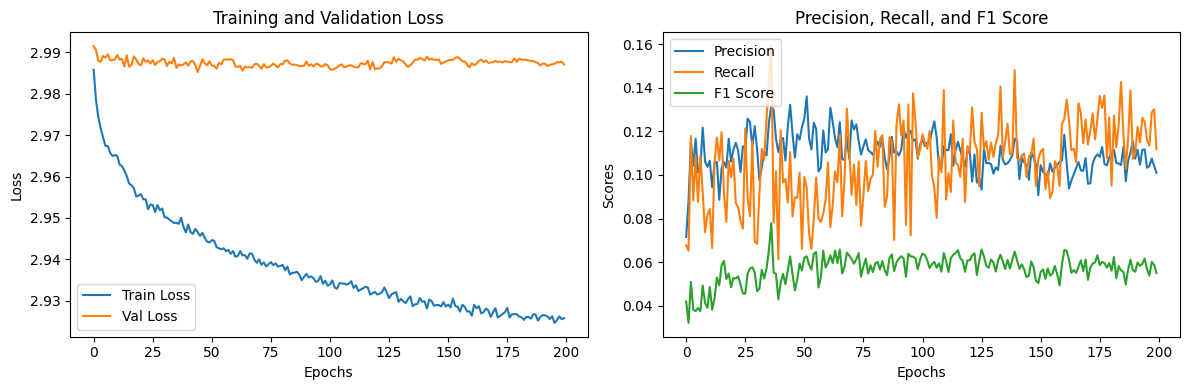

In [115]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_validate_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.1, stepslr=10, gamma=0.9):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, stepslr, gamma=gamma)

    train_losses = []
    val_losses = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for i, (inputs, labels) in enumerate(tqdm(train_loader, total=len(train_data_loader), desc=f'Epoch {epoch + 1}')):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs.float())
            # print(outputs, labels.unsqueeze(1))
            loss = criterion(outputs.squeeze(1), labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        
        # print(running_train_loss, len(train_loader))
        train_loss = running_train_loss / len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        running_val_loss = 0.0
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs.float())
                loss = criterion(outputs.squeeze(1), labels)
                running_val_loss += loss.item()

                # print(outputs.shape, labels.shape)
                # print(outputs, labels)
                predicted = torch.argmax(outputs.squeeze(1), 1)
                labels = torch.argmax(labels, 1)
                # print(predicted.shape, labels.shape)
                # print(predicted, labels)
                # break
                all_preds.extend(predicted.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        val_loss = running_val_loss / len(val_loader)
        val_losses.append(val_loss)

        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

        scheduler.step()

        print(f"Epoch [{epoch + 1}/{num_epochs}] "
              f"Train Loss: {train_loss:.4f} "
              f"Val Loss: {val_loss:.4f} "
              f"Precision: {precision:.4f} "
              f"Recall: {recall:.4f} "
              f"F1 Score: {f1:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(precision_scores, label='Precision')
    plt.plot(recall_scores, label='Recall')
    plt.plot(f1_scores, label='F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('Scores')
    plt.title('Precision, Recall, and F1 Score')
    plt.legend()

    plt.tight_layout()
    plt.show()


model = CustomLinearClassifier(input_dim=768, num_classes=20)
train_validate_model(model, train_data_loader, test_data_loader, num_epochs=200, learning_rate=0.01)


In [21]:
model.to(device)
criterion = nn.CrossEntropyLoss()

train_losses = []
val_losses = []
precision_scores = []
recall_scores = []
f1_scores = []

model.eval()
running_val_loss = 0.0
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs.float())
        loss = criterion(outputs.squeeze(1), labels)
        running_val_loss += loss.item()

        # print(outputs.shape, labels.shape)
        # print(outputs, labels)
        predicted = torch.argmax(outputs.squeeze(1), 1)
        labels = torch.argmax(labels, 1)
        # print(predicted.shape, labels.shape)
        # print(predicted, labels)
        # break
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

val_loss = running_val_loss / len(test_data_loader)
val_losses.append(val_loss)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
precision_scores.append(precision)
recall_scores.append(recall)
f1_scores.append(f1)


print(f"Val Loss: {val_loss:.4f} "
        f"Precision: {precision:.4f} "
        f"Recall: {recall:.4f} "
        f"F1 Score: {f1:.4f}")

Val Loss: 1.3855 Precision: 0.3750 Recall: 0.3658 F1 Score: 0.3510
